In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {"Round of 64":[150, 270, 220, 240], 
        "Round of 32":[80, 160, 120, 140], 
        "Round of 16":[0,  120, 80, 120], 
        "Elite 8":    [0,   80,  0,   80], 
        "Final 4":    [0,   160, 0,   160], 
        "Final":      [0,   0,   0,   0],
        "Percentile": [2, 75,   15, 70]}
rows = ["Random", "SVM", "Random BPI", "Human-SVM"]

df = pd.DataFrame(data, index=rows)

df["Total"] = df.iloc[:, :6].sum(1)

## Overall Data

In [3]:
df.sort_values(["Total"], ascending = False)

,Round of 64,Round of 32,Round of 16,Elite 8,Final 4,Final,Percentile,Total
SVM,270,160,120,80,160,0,75,790
Human-SVM,240,140,120,80,160,0,70,740
Random BPI,220,120,80,0,0,0,15,420
Random,150,80,0,0,0,0,2,230


## Round Accuracy

Note that this is not exactly the accuracy for later rounds since errors propagate. Thus even if an error was made in a previous round, the model can still get points in later rounds, so while the matchup it originally made the prediction based off was invalid, it was still "correct" in a sense.

In [4]:
accuracy = df.loc[:, ["Round of 64", "Round of 32", "Round of 16", "Elite 8", "Final 4", "Final"]] * 100 / 320
accuracy

,Round of 64,Round of 32,Round of 16,Elite 8,Final 4,Final
Random,46.875,25.00,0.0,0.0,0.0,0.0
SVM,84.375,50.00,37.5,25.0,50.0,0.0
Random BPI,68.750,37.50,25.0,0.0,0.0,0.0
Human-SVM,75.000,43.75,37.5,25.0,50.0,0.0


## Cumulative Scores

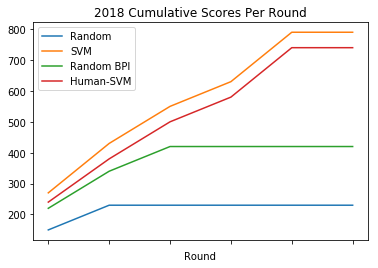

In [5]:
cumulative = df.loc[:, ["Round of 64", "Round of 32", "Round of 16", "Elite 8", "Final 4", "Final"]].cumsum(1)
cumulative = cumulative.transpose()
cumulative.index.name = "Round"
cumulative.plot(title="2018 Cumulative Scores Per Round")